In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

In [2]:
GLEAM = pd.read_csv("GLEAMorig1.csv")

In [3]:
GLEAM.columns

Index(['Region', 'Animal_species', 'Production_system', 'Commodity',
       'EmissionIntensity', 'Production_kgProtein', 'TotalGHG_CO2', 'TotalCO2',
       'Total CH4 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)',
       'FeedCO2', 'Feed, CH4 (kg CO2e)',
       'Feed: fertilizer & crop residues, N2O (kg CO2e)',
       'Feed: applied & deposited manure, N2O (kg CO2e)',
       'LUC: soy & palm, CO2 (kg CO2e)',
       'LUC: pasture expansion, CO2 (kg CO2e)',
       'Enteric fermentation, CH4 (kg CO2e)',
       'Manure management, CH4 (kg CO2e)', 'Manure management, N2O (kg CO2e)',
       'Direct energyCO2', 'Indirect energy, CO2 (kg CO2e)', 'PostfarmCO2'],
      dtype='object')

<AxesSubplot:>

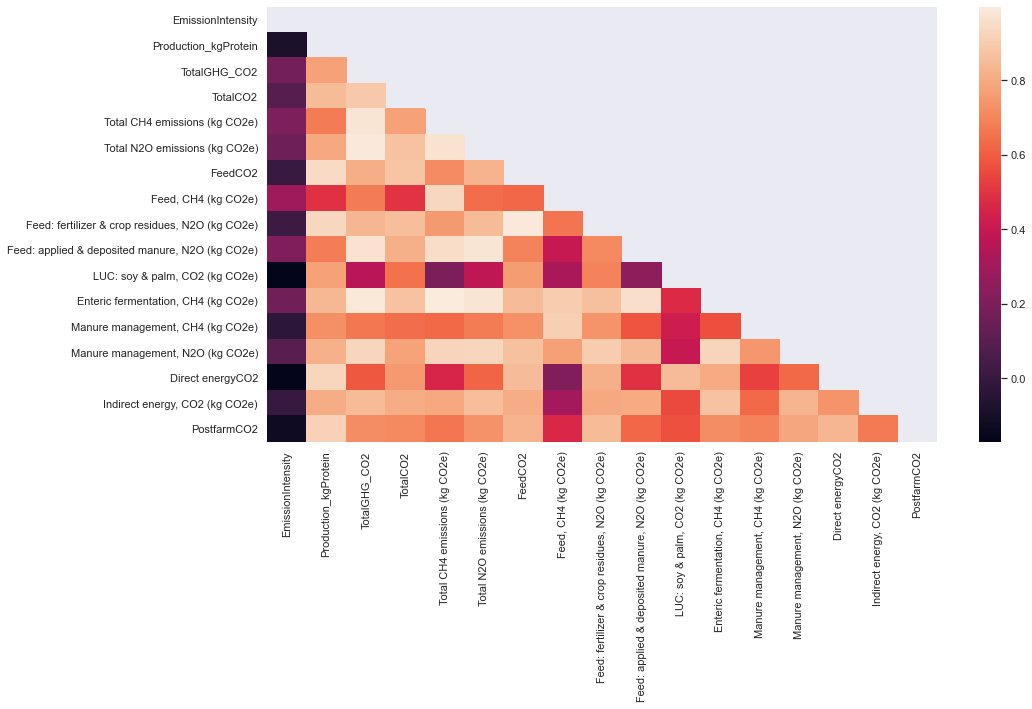

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
corr = GLEAM.drop('LUC: pasture expansion, CO2 (kg CO2e)',axis=1).corr()
sns.heatmap(corr, mask = np.triu(corr))

In [20]:
subset1 = GLEAM.loc[:,['Total N2O emissions (kg CO2e)','TotalGHG_CO2']].dropna()

In [21]:
x=pd.DataFrame(subset1['Total N2O emissions (kg CO2e)'])
y=subset1['TotalGHG_CO2']

In [22]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [23]:
lr.coef_

array([4.36091198])

In [24]:
lr.intercept_

-3739528200.108963

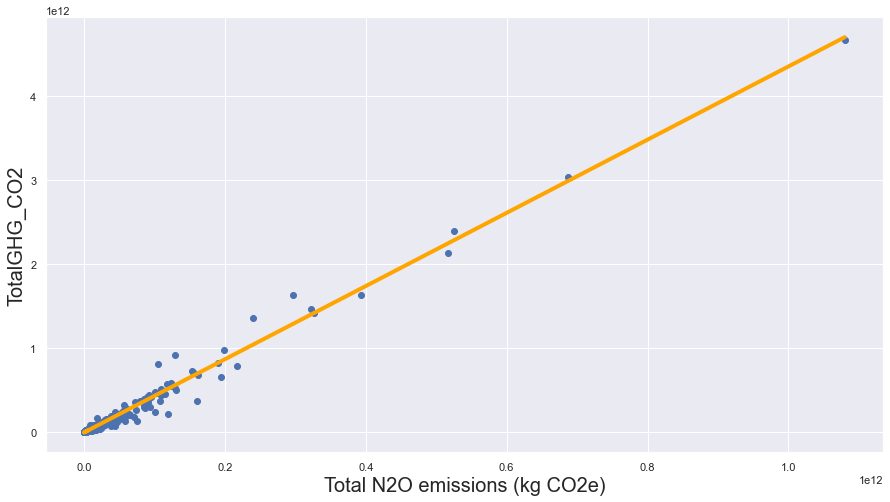

In [26]:
plt.scatter(x,y)
yhat=4.36091198*x + -3739528200.108963
fig= plt.plot(x, yhat, lw=4, c='orange' , label = 'regression line')
plt.xlabel('Total N2O emissions (kg CO2e)' , fontsize= 20)
plt.ylabel('TotalGHG_CO2' , fontsize = 20)
plt.show()

In [ ]:
plt.scatter(GLEAM['Total CH4 emissions (kg CO2e)'],GLEAM['TotalGHG_CO2']) 

In [27]:
subset2 = GLEAM.loc[:,['Total CH4 emissions (kg CO2e)','TotalGHG_CO2']].dropna()

In [29]:
x2=pd.DataFrame(subset2['Total CH4 emissions (kg CO2e)'])
y2=subset2['TotalGHG_CO2']

In [30]:
lr2 = LinearRegression()
lr2.fit(x2,y2)

LinearRegression()

In [31]:
lr2.coef_

array([1.75293418])

In [32]:
lr2.intercept_

12712414059.754745

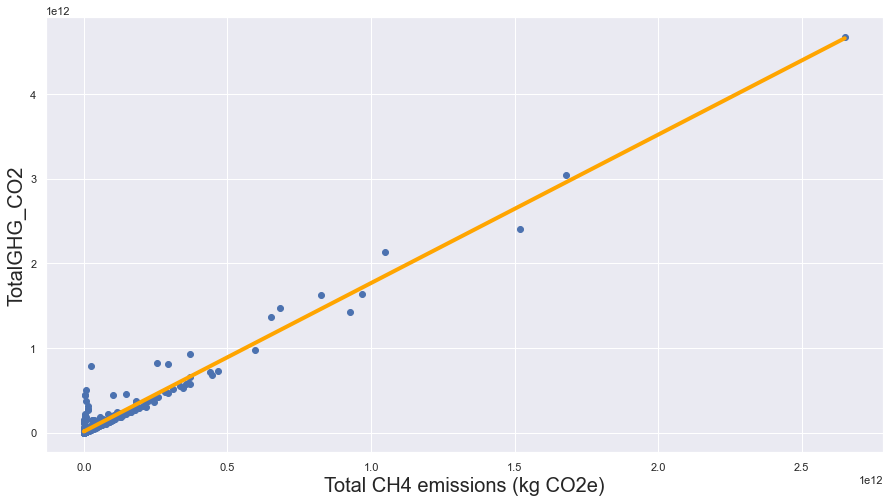

In [34]:
plt.scatter(x2,y2)
yhat2= 1.75293418*x2 + 12712414059.754745
fig= plt.plot(x2, yhat2, lw=4, c='orange' , label = 'regression line')
plt.xlabel('Total CH4 emissions (kg CO2e)' , fontsize= 20)
plt.ylabel('TotalGHG_CO2' , fontsize = 20)
plt.show()

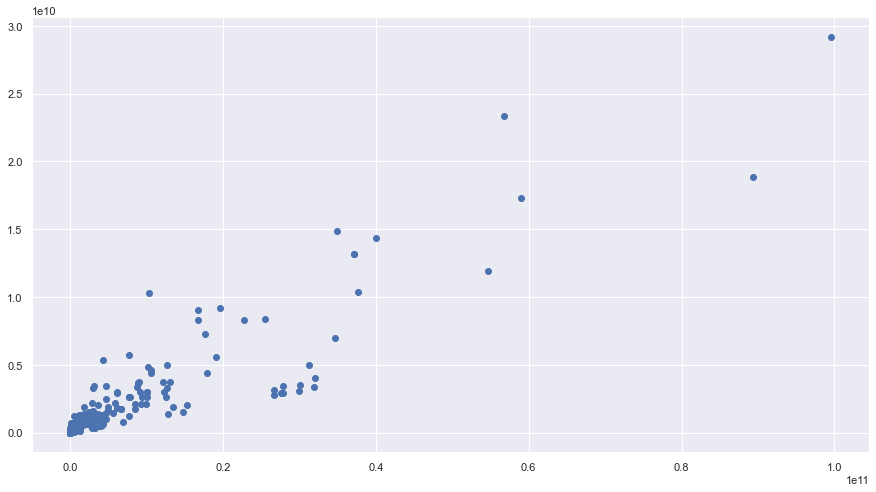

In [36]:
plt.scatter(GLEAM['PostfarmCO2'],GLEAM['Production_kgProtein']) 

In [37]:
subset3 = GLEAM.loc[:,['PostfarmCO2','Production_kgProtein']].dropna()

In [38]:
x3=pd.DataFrame(subset3['PostfarmCO2'])
y3=subset3['Production_kgProtein']

In [41]:
lr3 = LinearRegression()
lr3.fit(x3,y3)

LinearRegression()

In [42]:
lr3.coef_

array([0.26228448])

In [43]:
lr3.intercept_

166688247.00941575

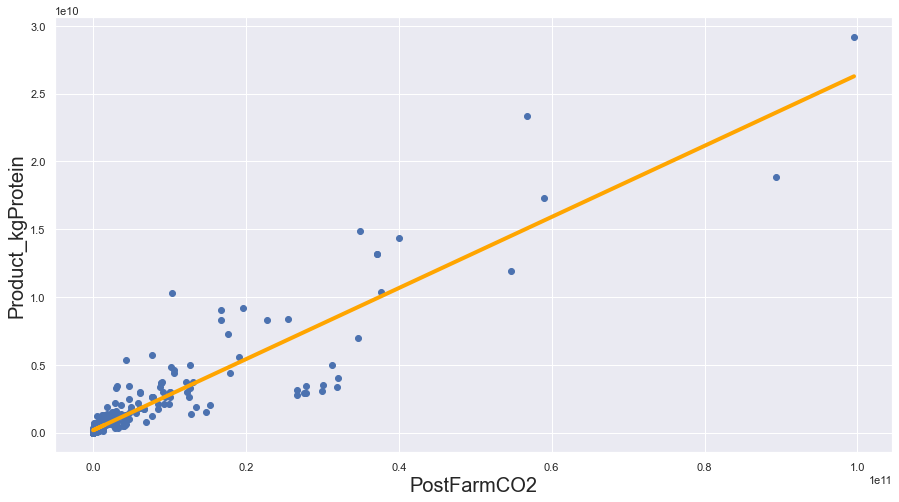

In [45]:
plt.scatter(x3,y3)
yhat3= 0.26228448*x3 + 166688247.00941575
fig= plt.plot(x3, yhat3, lw=4, c='orange' , label = 'regression line')
plt.xlabel('PostFarmCO2' , fontsize= 20)
plt.ylabel('Product_kgProtein' , fontsize = 20)
plt.show()